# Varying Staying Probability

How are prior and DeRDaVa valuation scores affected by **staying probability**?

### $\mathtt{Diabetes}$ dataset, SVM model, $11$ data sources, $\mathtt{Beta(16, 4)}$ prior

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_linear_svm

X, y = load_dataset('diabetes')
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)

NUM_OF_DATA_SOURCES = 11
support_set = tuple(range(NUM_OF_DATA_SOURCES))

staying_probabilities = {i: i / 10 for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)

model = model_linear_svm

N_ITER = 50
all_semivalues = np.zeros((N_ITER, NUM_OF_DATA_SOURCES))
all_derdava_values = np.zeros((N_ITER, NUM_OF_DATA_SOURCES))

for N in range(N_ITER):
    print(f"====> Iteration {N} starts. <====")
    indices = np.random.choice(len(X), size=NUM_OF_DATA_SOURCES * 10, replace=False)
    X_train = X[indices]
    y_train = y[indices]
    data_sources = generate_random_data_sources(X_train, y_train, num_of_data_sources=NUM_OF_DATA_SOURCES)
    model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
    valuable_model = ValuableModel(support_set, model_utility_function)
    beta_values = valuable_model.valuate(data_valuation_function="beta", 
                                         coalition_probability=coalition_probability, alpha=16, beta=4)
    derdava_values = valuable_model.valuate(data_valuation_function="robust beta", 
                                            coalition_probability=coalition_probability, alpha=16, beta=4)
    for i in range(NUM_OF_DATA_SOURCES):
        all_semivalues[N, i] = beta_values[i]
        all_derdava_values[N, i] = derdava_values[i]

====> Iteration 0 starts. <====
====> Iteration 1 starts. <====
====> Iteration 2 starts. <====
====> Iteration 3 starts. <====
====> Iteration 4 starts. <====
====> Iteration 5 starts. <====
====> Iteration 6 starts. <====
====> Iteration 7 starts. <====
====> Iteration 8 starts. <====
====> Iteration 9 starts. <====
====> Iteration 10 starts. <====
====> Iteration 11 starts. <====
====> Iteration 12 starts. <====
====> Iteration 13 starts. <====
====> Iteration 14 starts. <====
====> Iteration 15 starts. <====
====> Iteration 16 starts. <====
====> Iteration 17 starts. <====
====> Iteration 18 starts. <====
====> Iteration 19 starts. <====
====> Iteration 20 starts. <====
====> Iteration 21 starts. <====
====> Iteration 22 starts. <====
====> Iteration 23 starts. <====
====> Iteration 24 starts. <====
====> Iteration 25 starts. <====
====> Iteration 26 starts. <====
====> Iteration 27 starts. <====
====> Iteration 28 starts. <====
====> Iteration 29 starts. <====
====> Iteration 30 s

In [3]:
from statistics import mean, stdev

all_staying_probabilities = list(staying_probabilities.values())
mean_semivalues = np.zeros(NUM_OF_DATA_SOURCES)
stdev_semivalues = np.zeros(NUM_OF_DATA_SOURCES)
mean_derdava_values = np.zeros(NUM_OF_DATA_SOURCES)
stdev_derdava_values = np.zeros(NUM_OF_DATA_SOURCES)
for i in range(NUM_OF_DATA_SOURCES):
    mean_semivalues[i] = mean(all_semivalues[:, i])
    stdev_semivalues[i] = stdev(all_semivalues[:, i])
    mean_derdava_values[i] = mean(all_derdava_values[:, i])
    stdev_derdava_values[i] = stdev(all_derdava_values[:, i])

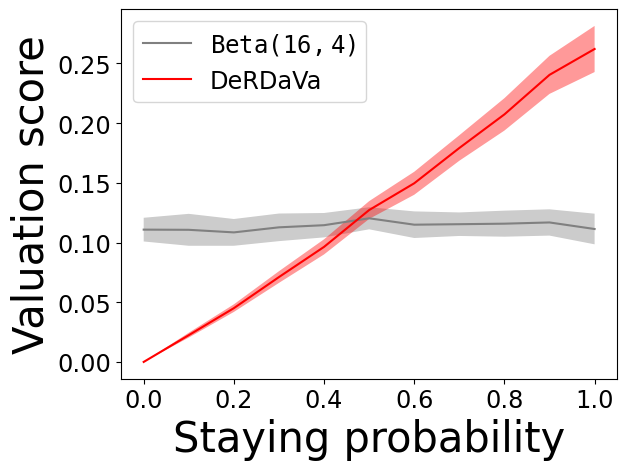

In [19]:
import matplotlib.pyplot as plt
import os

fig, ax = plt.subplots()

semivalue_line, = ax.plot(all_staying_probabilities, mean_semivalues, color='gray')
semivalue_line.set_label("$\mathtt{Beta(16, 4)}$")
ax.fill_between(all_staying_probabilities, mean_semivalues-1/2 * stdev_semivalues, mean_semivalues+1/2 * stdev_semivalues, facecolor="gray", alpha=0.4)

derdava_value_line, = ax.plot(all_staying_probabilities, mean_derdava_values, color='red')
derdava_value_line.set_label("DeRDaVa")
ax.fill_between(all_staying_probabilities, mean_derdava_values-1/2 * stdev_derdava_values, mean_derdava_values+1/2 * stdev_derdava_values, facecolor="red", alpha=0.4)
                      
ax.set_xlabel("Staying probability", fontsize=30)
ax.set_ylabel("Valuation score", fontsize=30)
ax.legend(fontsize='xx-large')
ax.tick_params(axis='both', labelsize='xx-large')

plt.show()
PATH_TO_IMAGES = "./images/staying_probability/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "sp_10_diabetes_svm_beta_16_4"), dpi=300, bbox_inches='tight')

### $\mathtt{Credit Card}$ dataset, Naïve Bayes model, $21$ data sources, Banzhaf prior

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_linear_svm

X, y = load_dataset('diabetes')
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)

NUM_OF_DATA_SOURCES = 21
support_set = tuple(range(NUM_OF_DATA_SOURCES))

staying_probabilities = {i: i / 20 for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)

model = model_linear_svm

N_ITER = 50
all_semivalues = np.zeros((N_ITER, NUM_OF_DATA_SOURCES))
all_derdava_values = np.zeros((N_ITER, NUM_OF_DATA_SOURCES))

for N in range(N_ITER):
    print(f"====> Iteration {N} starts. <====")
    indices = np.random.choice(len(X), size=NUM_OF_DATA_SOURCES * 10, replace=False)
    X_train = X[indices]
    y_train = y[indices]
    data_sources = generate_random_data_sources(X_train, y_train, num_of_data_sources=NUM_OF_DATA_SOURCES)
    model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
    valuable_model = ValuableModel(support_set, model_utility_function)
    beta_values = valuable_model.valuate(data_valuation_function="monte-carlo banzhaf", 
                                         coalition_probability=coalition_probability, tolerance=1.0001)
    derdava_values = valuable_model.valuate(data_valuation_function="012-mcmc robust banzhaf", 
                                            coalition_probability=coalition_probability, tolerance=1.0001)
    for i in range(NUM_OF_DATA_SOURCES):
        all_semivalues[N, i] = beta_values[i]
        all_derdava_values[N, i] = derdava_values[i]

====> Iteration 0 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0028828198311177
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0002535056814377
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 1500 - Average convergence rate = 1.000649604943219
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2000 - Average convergence rate = 1.0000936092058927
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9995389423487749
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0000605130417834
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3500 - Average convergence rate = 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 16


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 17


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6500 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 7000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 7500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 1 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0033415546683209
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9988599808891049
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9992334203629427
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9997334921288554
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 2500 - Average convergence rate = 1.0002975679198889
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0004256277139238
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 3500 - Average convergence rate =

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 2 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9964372429431627
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9996474229673619
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9993547621606789
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9996178087462394
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9998080102925481
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9997170483356493
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 3 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.00195163751698
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0001570425423665
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 1500 - Average convergence rate = 1.0006001189417244
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 2000 - Average convergence rate = 1.0003451274422792
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9996609169224617
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0001118847207981
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 3500 - Average convergence rate = 0

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 11


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 4 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0008593283957272
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9991601892537758
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1500 - Average convergence rate = 1.000080198269151
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9991424895245264
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9997226420582743
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9998281929658459
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 3500 - Average convergence rate = 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 17


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 14


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 12


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 5 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9997290594232008
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9986433371942925
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9994073659385947
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9999404904475677
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 2500 - Average convergence rate = 1.0001533491201557
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9997223208352108
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 6 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0015279443884175
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 1.000600180801073
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 1500 - Average convergence rate = 1.0003750481815377
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 2000 - Average convergence rate = 1.0000380650079557
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 2500 - Average convergence rate = 1.00030373791375
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0002466704987059
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 3500 - Average convergence rate = 0

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 7 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9986135517262071
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9985861612421064
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9995864778189517
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9992572822757863
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 2500 - Average convergence rate = 1.0000187724154959
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9997622502334441
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 3500 - Average convergence rate =

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 11


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 8 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9992336130668117
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9982222676557433
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 1500 - Average convergence rate = 1.0001099265156956
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9996494807126849
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9993904071918936
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9996977671421609
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 9 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9994548600394827
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 0.998589074605937
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9984266098839333
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9997040539557435
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9993672103055269
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9995923769506079
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 3500 - Average convergence rate =

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 16


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 11


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 11


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6000 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 7000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 7500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 10 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.996820450764461
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9986176844986664
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 1500 - Average convergence rate = 0.998801168650507
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9991336739682762
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9994376820688832
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9996046448642152
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 3500 - Average convergence rate =

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 16


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 16


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 14


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 11 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0025705695015146
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9988934177621303
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1500 - Average convergence rate = 0.999894437891057
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 2000 - Average convergence rate = 1.0000056375860396
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 2500 - Average convergence rate = 1.0001718743577594
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0000218515541541
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 7000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 12 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.997528805035345
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9988622744154977
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9994429132934025
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9993195867649731
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 2500 - Average convergence rate = 0.999506172879472
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9995221770896814
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 3500 - Average convergence rate = 0

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 16


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 11


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 7000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 7500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 13 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9990058723131868
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9995570417949894
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9999808332541553
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9995108490098836
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9996678649055216
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0001688876656107
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 17


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 14 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9995584857648633
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 1000 - Average convergence rate = 1.000074562969416
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9994878072268703
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 2000 - Average convergence rate = 1.0000456997789604
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9998431526328458
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9998199768893191
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 15 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9969258564233507
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0007284328334844
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1500 - Average convergence rate = 1.000459889713487
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9999245265959241
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9999229088164505
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0000968724447181
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 17


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 14


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 12


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6000 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 7000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 16 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9998010230203439
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9985318702611007
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9991584203476153
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9996998410436069
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 2500 - Average convergence rate = 1.0000465650550814
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9998066042201044
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 19


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 18


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 17 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.000553032538778
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0004320411177308
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 1500 - Average convergence rate = 1.0002158877844511
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9992693578454137
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9998540165331462
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9994828763785729
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 17


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 18 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9996243733489327
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0000593859800495
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9995498933732486
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2000 - Average convergence rate = 1.000702244753241
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 2500 - Average convergence rate = 1.0009390767526567
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0002631352393039
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 19 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9991752716162758
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9992239918887481
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9990904173373669
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9994288885959103
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 2500 - Average convergence rate = 1.0006635697602069
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 0.999874829858185
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 3500 - Average convergence rate =

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 12


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 11


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 20 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9980445599054497
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1000 - Average convergence rate = 0.998773946105868
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9991000040857636
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9991311388740789
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9994076873094743
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 0.999424205246685
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 3500 - Average convergence rate =

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 19


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 11


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 21 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9989748910182341
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9991302264722111
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9998389151125551
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9995680387071263
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 2500 - Average convergence rate = 1.0000793382353386
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9994260079894806
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 16


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 12


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 22 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0042614244836123
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0013023735262059
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9992727990284974
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9998262747942744
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9999510349793894
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 3000 - Average convergence rate = 0.999709340442815
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 3500 - Average convergence rate =

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 14


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 11


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 23 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0030695407606665
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0007675828324156
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 1500 - Average convergence rate = 0.999425256317213
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9996036072300326
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9998051761698918
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9996063540228399
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 17


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 12


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 11


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 24 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0022031029168548
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9994575170854668
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9989846266071445
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9993606762657509
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9994076086843777
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9997840523766535
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 11


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 14


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 25 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0035003977328303
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0015360214920885
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 1500 - Average convergence rate = 1.0003178762789744
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9998484430550383
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9998713094130929
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0004411094148309
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3500 - Average convergence rate

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 14


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 26 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0006686188803486
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0012810413457554
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1500 - Average convergence rate = 1.0004857778547969
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 2000 - Average convergence rate = 1.0015844976032104
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 2500 - Average convergence rate = 1.0005083932940788
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0003985068285797
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 3500 - Average convergence rate

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 12


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 13


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 11


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 27 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0069249921808883
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9996564440515165
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9992864832271522
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9993003318031461
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9997318702600422
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9991464245186437
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 3500 - Average convergence rate

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 17


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 16


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 14


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 28 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0002903421780425
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0013138642460708
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9999583046972911
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9999486161585619
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9995097452993051
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9997330574308487
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3500 - Average convergence rate

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 18


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 16


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 29 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9991809797100172
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0014792465680817
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9999932058561094
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 2000 - Average convergence rate = 1.0002005058873944
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9998259819485549
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 3000 - Average convergence rate = 1.000391363696485
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 3500 - Average convergence rate =

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 12


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 30 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0020577980111536
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9993816459237701
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 1500 - Average convergence rate = 1.0004672353067743
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9998009280476756
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9999414560189234
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0001160335168915
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 3500 - Average convergence rate =

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 16


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 11


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 7


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6500 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 7000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 7500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 8000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 31 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9977756851757142
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 0.999688784451582
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9993783779031443
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9997945903720068
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 2500 - Average convergence rate = 1.0000178532746107
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3000 - Average convergence rate = 0.999875092520549
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 3500 - Average convergence rate = 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 12


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 14


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 32 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0035321896145803
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9999663856741469
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9996549356710476
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 2000 - Average convergence rate = 1.000046078558258
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9994706125371996
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0001655032465704
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 17


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 33 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.001888076413968
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9992008279661219
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 1500 - Average convergence rate = 1.0000317382521158
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2000 - Average convergence rate = 0.999442030520225
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9999275309161824
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9997661327888034
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3500 - Average convergence rate =

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 34 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9967674097140469
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9996246489048838
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9999527385952869
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2000 - Average convergence rate = 1.000428402005996
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 2500 - Average convergence rate = 1.0006860234183013
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9998058501860512
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 16


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 35 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9969934058674033
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9994001370129857
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1500 - Average convergence rate = 0.999538592436659
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9994739076820638
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9994453704851732
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3000 - Average convergence rate = 0.99966479027551
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 3500 - Average convergence rate = 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 18


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 17


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 14


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2500 - Average convergence rate = nan
---------> Number of values that have not converged: 14


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 3500 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 4500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 7000 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 36 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9992951481182327
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9977805050724894
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9986823489694766
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9994255542711737
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2500 - Average convergence rate = 1.0002946488714102
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0000194558622972
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 3500 - Average convergence rate

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 6


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 37 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9992308425738285
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9995342719558986
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9996790764426468
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9999442407809139
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 2500 - Average convergence rate = 1.0004539192222741
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 3000 - Average convergence rate = 1.000417307327519
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 1


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 3


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 38 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0009622103503861
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0001001999168528
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9992790235444544
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9999771618114889
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9999682253937587
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 3000 - Average convergence rate = 1.0000517916125624
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 3500 - Average convergence rate

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 10


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 39 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 0.9990595393580706
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0006024002470877
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9994325528075441
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 2000 - Average convergence rate = 0.9996401494634823
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 2500 - Average convergence rate = 0.9994351028643681
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9999819491807911
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 3500 - Average convergence rate 

/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 500 - Average convergence rate = nan
---------> Number of values that have not converged: 15


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1000 - Average convergence rate = nan
---------> Number of values that have not converged: 16


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 1500 - Average convergence rate = nan
---------> Number of values that have not converged: 9


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 2000 - Average convergence rate = nan
---------> Number of values that have not converged: 8


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 5500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 6500 - Average convergence rate = nan
---------> Number of values that have not converged: 5


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 7000 - Average convergence rate = nan
---------> Number of values that have not converged: 4


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /
/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Monte-Carlo Round 7500 - Average convergence rate = nan
---------> Number of values that have not converged: 2


/home/tianxiao/URDaVa/urdava/urdava/sampling.py:40: RuntimeWarning: invalid value encountered in scalar divide
  statistics[i] = (((chain_len - 1) * mean_within_chain_variance + between_chain_variance) /


====> Iteration 40 starts. <====
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 21
====> Monte-Carlo Round 500 - Average convergence rate = 1.0053656800029631
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1000 - Average convergence rate = 1.0003256084377017
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 1500 - Average convergence rate = 0.9993048469151682
---------> Number of values that have not converged: 19


In [ ]:
from statistics import mean, stdev

all_staying_probabilities = list(staying_probabilities.values())
mean_semivalues = np.zeros(NUM_OF_DATA_SOURCES)
stdev_semivalues = np.zeros(NUM_OF_DATA_SOURCES)
mean_derdava_values = np.zeros(NUM_OF_DATA_SOURCES)
stdev_derdava_values = np.zeros(NUM_OF_DATA_SOURCES)
for i in range(NUM_OF_DATA_SOURCES):
    mean_semivalues[i] = mean(all_semivalues[:, i])
    stdev_semivalues[i] = stdev(all_semivalues[:, i])
    mean_derdava_values[i] = mean(all_derdava_values[:, i])
    stdev_derdava_values[i] = stdev(all_derdava_values[:, i])

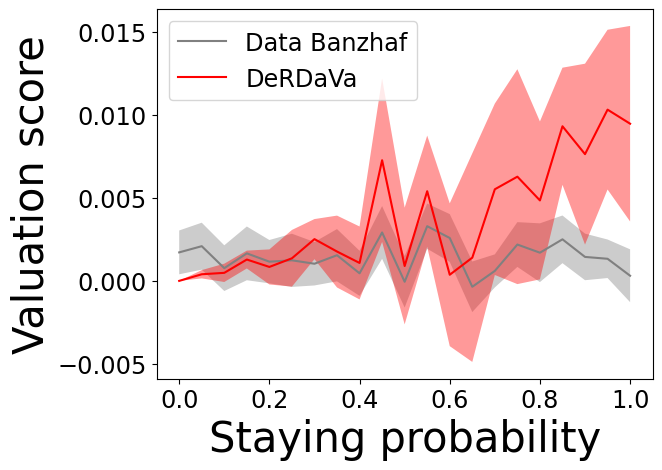

In [12]:
import matplotlib.pyplot as plt
import os

fig, ax = plt.subplots()

semivalue_line, = ax.plot(all_staying_probabilities, mean_semivalues, color='gray')
semivalue_line.set_label("Data Banzhaf")
ax.fill_between(all_staying_probabilities, mean_semivalues-1/2 * stdev_semivalues, mean_semivalues+1/2 * stdev_semivalues, facecolor="gray", alpha=0.4)

derdava_value_line, = ax.plot(all_staying_probabilities, mean_derdava_values, color='red')
derdava_value_line.set_label("DeRDaVa")
ax.fill_between(all_staying_probabilities, mean_derdava_values-1/2 * stdev_derdava_values, mean_derdava_values+1/2 * stdev_derdava_values, facecolor="red", alpha=0.4)
                      
ax.set_xlabel("Staying probability", fontsize=30)
ax.set_ylabel("Valuation score", fontsize=30)
ax.legend(fontsize='xx-large', loc='upper left')
ax.tick_params(axis='both', labelsize='xx-large')

plt.show()
PATH_TO_IMAGES = "./images/staying_probability/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "sp_20_creditcard_nb_banzhaf"), dpi=300, bbox_inches='tight')